In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from collections import OrderedDict
import itertools
FONTSIZE = 16
mpl.rcParams['font.size'] = FONTSIZE
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern, Latin Modern Roman, Bitstream Vera Serif'
mpl.rcParams['text.usetex'] = True

In [3]:
E_ENERGIES = [1, 2]
MU_ENERGIES = [25]
PI_ENERGIES = [4, 6, 8]

E_DATACOLOURS = {1:'grey',2:'silver'}
PI_DATACOLOURS = {4:'red', 6:'green', 8:'blue'}
MU_DATACOLOURS = {25:'black'}

In [4]:
E_DATADIR = r'/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/data/l3/bwd_2/{0}GeV_e.hd5'
PI_DATADIR = r'/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/data/l3/bwd_2/{0}GeV_pi.hd5'
MU_DATADIR = r'/home/shivesh/Documents/physics/PhD/beamtest/DDC2/pingu/latest/data/l3/bwd_2/{0}GeV_mu.hd5'

E_DATAPATHS = OrderedDict(zip(E_ENERGIES ,[E_DATADIR.format(x) for x in E_ENERGIES]))
PI_DATAPATHS = OrderedDict(zip(PI_ENERGIES ,[PI_DATADIR.format(x) for x in PI_ENERGIES]))
MU_DATAPATHS = OrderedDict(zip(MU_ENERGIES ,[MU_DATADIR.format(x) for x in MU_ENERGIES]))

BINNING = np.linspace(0, 40, 50)
BIN_CENTERS = (BINNING[:-1] + BINNING[1:])/2.

In [5]:
E_DF = OrderedDict()
for en in E_DATAPATHS.iterkeys():
    store = pd.HDFStore(E_DATAPATHS[en])
    E_DF[en] = store['df']
    store.close()

PI_DF = OrderedDict()
for en in PI_DATAPATHS.iterkeys():
    store = pd.HDFStore(PI_DATAPATHS[en])
    PI_DF[en] = store['df']
    store.close()
    
MU_DF = OrderedDict()
for en in MU_DATAPATHS.iterkeys():
    store = pd.HDFStore(MU_DATAPATHS[en])
    MU_DF[en] = store['df']
    store.close()

In [6]:
E_DATA = OrderedDict()
for en in E_DF.iterkeys():
    E_DATA[en] = []
    for idx in xrange(E_DF[en]['index'].max() + 1):
        mask_idx = E_DF[en]['index'] == idx
        wv = E_DF[en][mask_idx]
        E_DATA[en].append(wv['charge'][0])
        # E_DATA[en].append(wv['gauss_int'][0])
    E_DATA[en] = np.array(E_DATA[en])

PI_DATA = OrderedDict()
for en in PI_DF.iterkeys():
    PI_DATA[en] = []
    for idx in xrange(PI_DF[en]['index'].max() + 1):
        mask_idx = PI_DF[en]['index'] == idx
        wv = PI_DF[en][mask_idx]
        PI_DATA[en].append(wv['charge'][0])
        # PI_DATA[en].append(wv['gauss_int'][0])
    PI_DATA[en] = np.array(PI_DATA[en])
    
MU_DATA = OrderedDict()
for en in MU_DF.iterkeys():
    MU_DATA[en] = []
    for idx in xrange(MU_DF[en]['index'].max() + 1):
        mask_idx = MU_DF[en]['index'] == idx
        wv = MU_DF[en][mask_idx]
        MU_DATA[en].append(wv['charge'][0])
        # MU_DATA[en].append(wv['gauss_int'][0])
    MU_DATA[en] = np.array(MU_DATA[en])

In [11]:
# normalise to
nt = PI_DATA[4] # 8 GeV pi data
#nt = E_DATA[1] # 1 GeV e data

e_norm = OrderedDict()
for en in E_ENERGIES:
    e_norm[en] = len(nt) / float(len(E_DATA[en]))

pi_norm = OrderedDict()
for en in PI_ENERGIES:
    pi_norm[en] = len(nt) / float(len(PI_DATA[en]))
    
mu_norm = OrderedDict()
for en in MU_ENERGIES:
    mu_norm[en] = len(nt) / float(len(MU_DATA[en]))

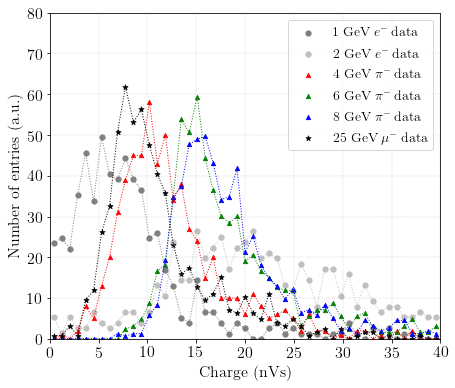

In [12]:
fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111)

ax.set_xlim(np.min(BINNING), np.max(BINNING))
ax.set_ylim(0, 80)

for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls=':', color='gray', alpha=1, linewidth=0.3)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls=':', color='gray', alpha=1, linewidth=0.3)

ax.tick_params(axis='x', labelsize=FONTSIZE)
ax.tick_params(axis='y', labelsize=FONTSIZE)

ax.set_xlabel('Charge (nVs)', fontsize=FONTSIZE)
ax.set_ylabel('Number of entries (a.u.)', fontsize=FONTSIZE)

for en in E_ENERGIES:
    hist_data, _ = np.histogram(E_DATA[en], BINNING, weights=[e_norm[en]]*len(E_DATA[en]))
    h2, _ = np.histogram(E_DATA[en], BINNING, weights=np.array([e_norm[en]]*len(E_DATA[en]))**2)

    ax.scatter(BIN_CENTERS, hist_data, marker='o', s=30, color=E_DATACOLOURS[en],
        linewidth=0.7, label=r'$'+'{0}'.format(en)+r'~{\rm GeV}\:e^-\:{\rm data}$')
    ax.plot(BIN_CENTERS, hist_data, ls=':', lw=1, color=E_DATACOLOURS[en])
#     ax.errorbar(
#         BIN_CENTERS, hist_data, color=E_DATACOLOURS[en],
#         xerr=0, yerr=np.sqrt(h2), capsize=1.3,
#         alpha=1, linestyle='None', markersize=2, linewidth=1.2
#     )

for en in PI_ENERGIES:
    hist_data, _ = np.histogram(PI_DATA[en], BINNING, weights=[pi_norm[en]]*len(PI_DATA[en]))
    h2, _ = np.histogram(PI_DATA[en], BINNING, weights=np.array([pi_norm[en]]*len(PI_DATA[en]))**2)

    ax.scatter(BIN_CENTERS, hist_data, marker='^', s=20, color=PI_DATACOLOURS[en],
        linewidth=0.7, label=r'$'+'{0}'.format(en)+r'~{\rm GeV}\:\pi^-\:{\rm data}$')
    ax.plot(BIN_CENTERS, hist_data, ls=':', lw=1, color=PI_DATACOLOURS[en])
#     ax.errorbar(
#         BIN_CENTERS, hist_data, color=PI_DATACOLOURS[en],
#         xerr=0, yerr=np.sqrt(h2), capsize=1.3,
#         alpha=1, linestyle='None', markersize=2, linewidth=1.2
#     )

for en in MU_ENERGIES:
    hist_data, _ = np.histogram(MU_DATA[en], BINNING, weights=[mu_norm[en]]*len(MU_DATA[en]))
    h2, _ = np.histogram(MU_DATA[en], BINNING, weights=np.array([mu_norm[en]]*len(MU_DATA[en]))**2)

    ax.scatter(BIN_CENTERS, hist_data, marker='*', s=30, color=MU_DATACOLOURS[en],
        linewidth=0.7, label=r'$'+'{0}'.format(en)+r'~{\rm GeV}\:\mu^-\:{\rm data}$')
    ax.plot(BIN_CENTERS, hist_data, ls=':', lw=1, color=MU_DATACOLOURS[en])
#     ax.errorbar(
#         BIN_CENTERS, hist_data, color=MU_DATACOLOURS[en],
#         xerr=0, yerr=np.sqrt(h2), capsize=1.3,
#         alpha=1, linestyle='None', markersize=2, linewidth=1.2
#     )

ax.legend(prop=dict(size=FONTSIZE-2))